# data

In [ ]:
# %cd /home/lab16/cnn/dataset/TRAIN
# !unzip /home/lab16/cnn/dataset/TRAIN.zip

In [1]:
# %cd /home/lab16/cnn/dataset/VALID
# !unzip /home/lab16/cnn/dataset/VALID.zip

In [ ]:
# %cd /home/lab16/cnn/dataset/TRAIN
# # -al로 숨겨져있는 파일 확인하기
# %ls -al
# #  .ipynb_checkpoints 파일 제거하기
# %rm -rf .ipynb_checkpoints

/home/lab16/cnn/dataset/TRAIN
total 180
drwxr-xr-x 4 lab16 multi   4096 Feb 17 13:32 ./
drwxr-xr-x 8 lab16 multi   4096 Feb 17 13:31 ../
drwxr-xr-x 2 lab16 multi 106496 Feb 17 13:27 with-leash/
drwxr-xr-x 2 lab16 multi  69632 Feb 17 10:33 without-leash/


In [ ]:
# %cd /home/lab16/cnn/dataset/VALID
# # -al로 숨겨져있는 파일 확인하기
# %ls -al
# #  .ipynb_checkpoints 파일 제거하기
# %rm -rf .ipynb_checkpoints

/home/lab16/cnn/dataset/VALID
total 36
drwxr-xr-x 4 lab16 multi  4096 Feb 17 13:32 ./
drwxr-xr-x 8 lab16 multi  4096 Feb 17 13:31 ../
drwxr-xr-x 2 lab16 multi 16384 Feb 17 13:27 with-leash/
drwxr-xr-x 2 lab16 multi 12288 Feb 17 10:35 without-leash/


In [ ]:
%cd /home/lab16/cnn/Modeling/RESNET

/home/lab16/cnn/Modeling/RESNET


In [ ]:
pwd

'/home/lab16/cnn/Modeling/RESNET'

# 라이브러리 호출

In [ ]:
from keras.applications.resnet_v2 import ResNet101V2, preprocess_input,decode_predictions
from keras.preprocessing.image import img_to_array
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,AveragePooling2D,GlobalAveragePooling2D
from keras.initializers import HeUniform
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizer_v2.adam import Adam
from tensorflow import keras
import numpy as np
from PIL import Image
import cv2

# 데이터 불러오기

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,
                            horizontal_flip=True,
                            vertical_flip=True)

In [ ]:
base_model = ResNet101V2(weights = 'imagenet',include_top = False,input_shape=(224,224,3))

In [ ]:
## dataset1
# Found 2274 images belonging to 2 classes.
# Found 562 images belonging to 2 classes.

In [ ]:
## 0216 dataset
# Found 3459 images belonging to 2 classes.
# Found 412 images belonging to 2 classes.

In [ ]:
## 0217 dataset :clothes 추가
# Found 3659 images belonging to 2 classes.
# Found 492 images belonging to 2 classes.

In [ ]:
## 0217 final dataset
# Found 3759 images belonging to 2 classes.
# Found 695 images belonging to 2 classes.

In [ ]:
train_loader = img_gen.flow_from_directory(directory='/home/lab16/cnn/dataset/TRAIN',target_size=(224,224),batch_size=64,seed=42)
test_loader = img_gen.flow_from_directory(directory='/home/lab16/cnn/dataset/VALID',target_size=(224,224),batch_size=64,seed=42)

Found 3759 images belonging to 2 classes.
Found 695 images belonging to 2 classes.


In [ ]:
idx_to_classes={val:key for key, val in train_loader.class_indices.items()}
idx_to_classes

{0: 'with-leash', 1: 'without-leash'}

In [ ]:
for layer in base_model.layers[:-30]:
    layer.trainable=False

In [ ]:
base_model.summary()

In [ ]:
last_layer = base_model.get_layer(base_model.layers[-1].name)
last_output = last_layer.output
x = Flatten()(last_output)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2, activation ='softmax')(x)

In [ ]:
new_model = Model(inputs = base_model.input,outputs = x, name='ResNet101V2_dataset2')

In [ ]:
new_model.compile(loss='categorical_crossentropy', 
              optimizer = Adam(learning_rate = 0.001 ),
              metrics=['acc'])

In [ ]:
early_stopping=EarlyStopping(min_delta = 0, patience=5) 
checkpointer = ModelCheckpoint(filepath='checkpointer/0217_aug_flip.hdf5',verbose=1,save_best_only = True) 
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
#                                                  patience=3, min_lr=1e-06)

In [ ]:
hist = new_model.fit(train_loader,
                    epochs=50,  
                    validation_data=test_loader,
                     verbose=1,callbacks=[early_stopping,checkpointer]
                    )

Epoch 1/50
59/59 [==============================] - ETA: 0s - loss: 0.5938 - acc: 0.7489
Epoch 00001: val_loss improved from inf to 16.94592, saving model to checkpointer/0217_aug_flip.hdf5


/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


59/59 [==============================] - 34s 571ms/step - loss: 0.5938 - acc: 0.7489 - val_loss: 16.9459 - val_acc: 0.4504
Epoch 2/50
59/59 [==============================] - ETA: 0s - loss: 0.3063 - acc: 0.8795
Epoch 00002: val_loss improved from 16.94592 to 1.33936, saving model to checkpointer/0217_aug_flip.hdf5
59/59 [==============================] - 34s 573ms/step - loss: 0.3063 - acc: 0.8795 - val_loss: 1.3394 - val_acc: 0.7094
Epoch 3/50
59/59 [==============================] - ETA: 0s - loss: 0.2078 - acc: 0.9199
Epoch 00003: val_loss improved from 1.33936 to 0.91851, saving model to checkpointer/0217_aug_flip.hdf5
59/59 [==============================] - 34s 575ms/step - loss: 0.2078 - acc: 0.9199 - val_loss: 0.9185 - val_acc: 0.7727
Epoch 4/50
59/59 [==============================] - ETA: 0s - loss: 0.1522 - acc: 0.9391
Epoch 00004: val_loss improved from 0.91851 to 0.46425, saving model to checkpointer/0217_aug_flip.hdf5
59/59 [==============================] - 34s 583ms/st

In [ ]:
# 모델 저장하기
new_model.save("0217_aug_flip", include_optimizer=False)

INFO:tensorflow:Assets written to: 0217_aug_flip/assets


/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


# 모델 검증

## acc-loss plot

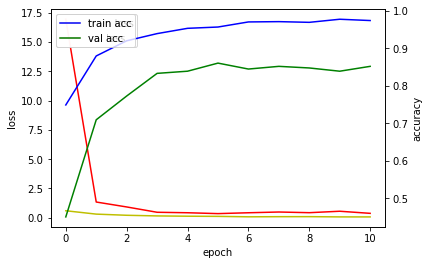

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

## predict

In [ ]:
from keras.models import load_model
new_model=load_model('/home/lab16/cnn/Modeling/RESNET/0217_aug_flip')

In [ ]:
imgs_with=['/home/lab16/cnn/dataset/test_img/with/with_1.png',
'/home/lab16/cnn/dataset/test_img/with/with_2.png',
'/home/lab16/cnn/dataset/test_img/with/with_3.png',
'/home/lab16/cnn/dataset/test_img/with/with_4.png']

imgs_without=['/home/lab16/cnn/dataset/test_img/without/without_1.png',
'/home/lab16/cnn/dataset/test_img/without/without_2.png',
'/home/lab16/cnn/dataset/test_img/without/without_3.png',
'/home/lab16/cnn/dataset/test_img/without/without_4.png']

In [ ]:
def pred(img_path):
    print('-'*20)
    Image.open(img_path).convert('RGB').resize((224,224)).show()
    img = keras.preprocessing.image.load_img(img_path, target_size=(224,224))
    array = keras.preprocessing.image.img_to_array(img) # (224,224,3)
    array = np.expand_dims(array, axis=0)  # (1, 299, 299, 3)
    img_array = preprocess_input(array)
    preds = new_model.predict(img_array)
    idx_to_classes={0: 'with-leash', 1: 'without-leash'}
    print(idx_to_classes[np.argmax(preds)])
    print(preds)

--------------------


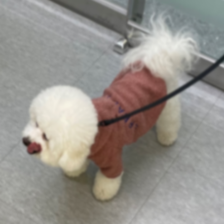

with-leash
[[0.96516645 0.03483356]]
--------------------


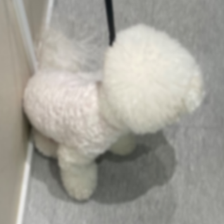

with-leash
[[0.90038615 0.09961382]]
--------------------


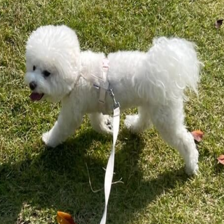

with-leash
[[0.99848133 0.00151874]]
--------------------


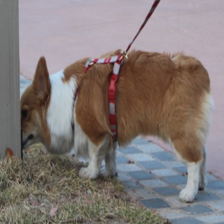

with-leash
[[9.9997663e-01 2.3362918e-05]]


In [ ]:
for i in imgs_with:
    pred(i)

--------------------


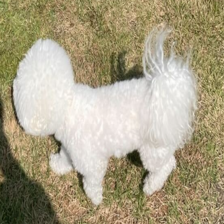

without-leash
[[0.3908192  0.60918087]]
--------------------


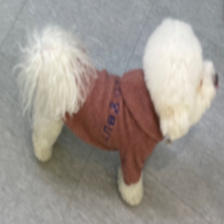

without-leash
[[1.2039819e-04 9.9987960e-01]]
--------------------


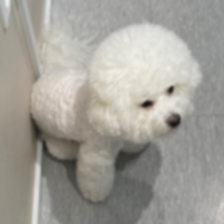

without-leash
[[1.5490966e-04 9.9984503e-01]]
--------------------


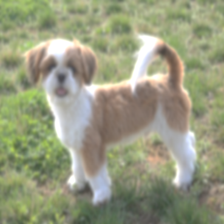

without-leash
[[1.6231948e-05 9.9998379e-01]]


In [ ]:
for i in imgs_without:
    pred(i)

## GradCAM

In [ ]:
import gradcam as gcm
from keras.models import load_model
#new_model=load_model('/home/lab16/cnn/Modeling/RESNET/0217_ResNet101V2_lastdata')

### target: with

In [ ]:
imgs_with=['/home/lab16/cnn/dataset/test_img/with/with_1.png',
'/home/lab16/cnn/dataset/test_img/with/with_2.png',
'/home/lab16/cnn/dataset/test_img/with/with_3.png',
'/home/lab16/cnn/dataset/test_img/with/with_4.png']

imgs_without=['/home/lab16/cnn/dataset/test_img/without/without_1.png',
'/home/lab16/cnn/dataset/test_img/without/without_2.png',
'/home/lab16/cnn/dataset/test_img/without/without_3.png',
'/home/lab16/cnn/dataset/test_img/without/without_4.png']

with-leash
[[0.96516645 0.03483356]]


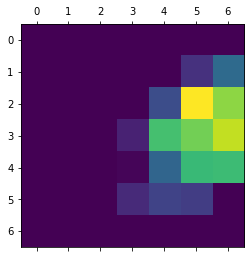

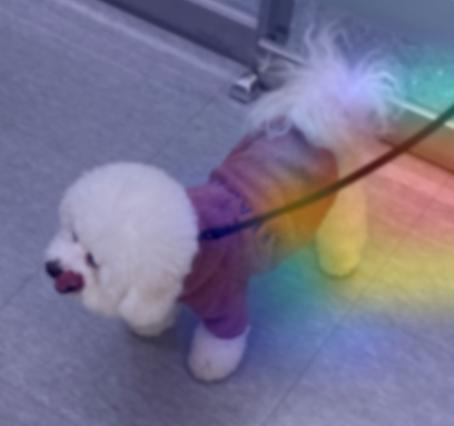

--------------------------------------------------------------------------------
with-leash
[[0.90038615 0.09961382]]


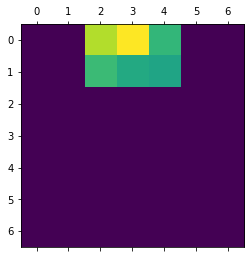

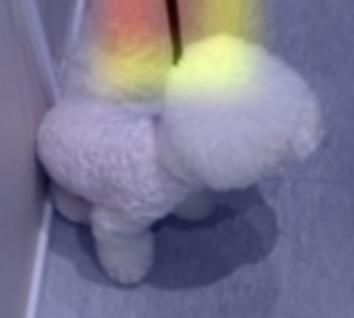

--------------------------------------------------------------------------------
with-leash
[[0.99848133 0.00151874]]


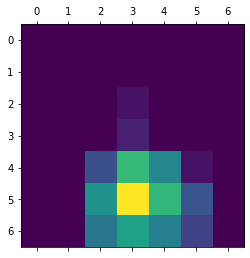

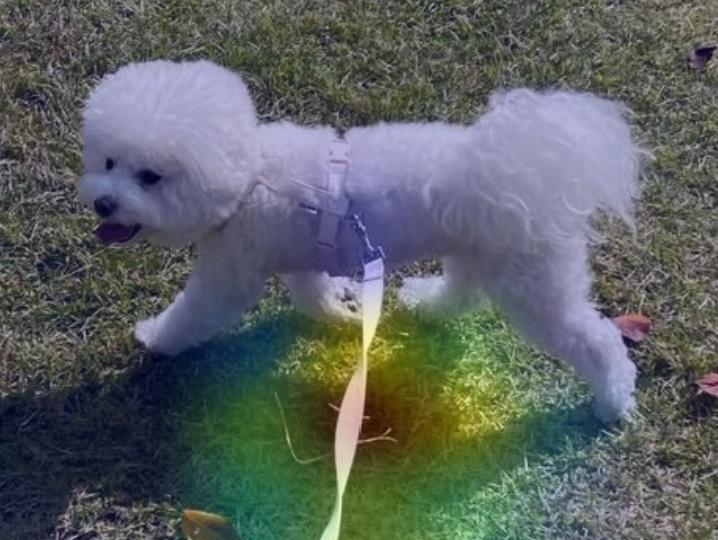

--------------------------------------------------------------------------------
with-leash
[[9.9997663e-01 2.3362918e-05]]


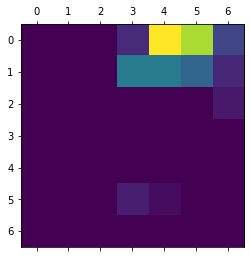

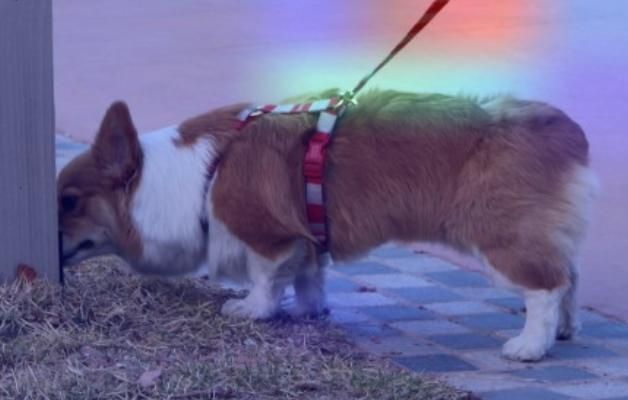

--------------------------------------------------------------------------------


In [ ]:
for i in imgs_with:
    gcm.show_GradCAM(i,img_size=(224,224),model=new_model,last_conv_layer_name = 'conv5_block3_3_conv')

### target : without

without-leash
[[0.3908192  0.60918087]]


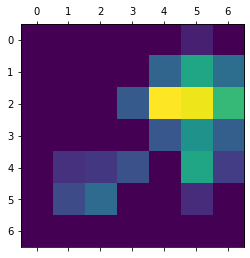

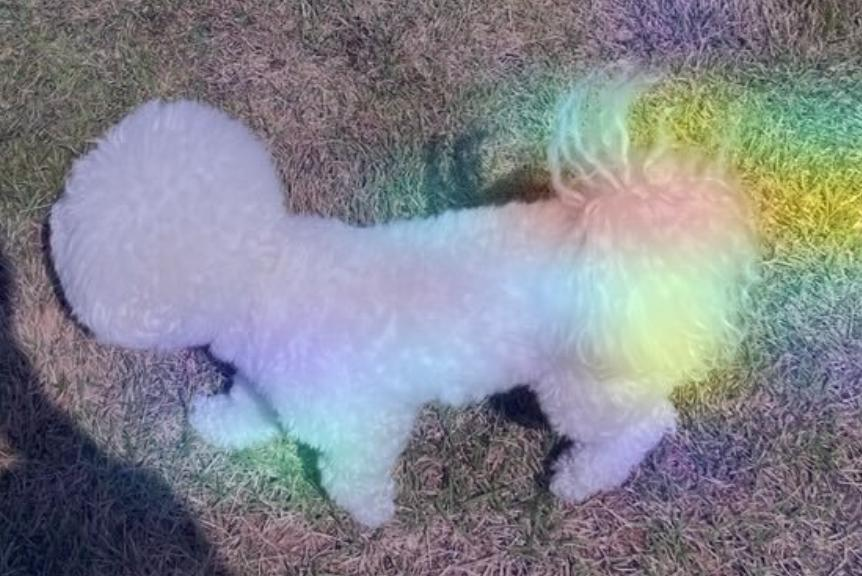

--------------------------------------------------------------------------------
without-leash
[[1.2039819e-04 9.9987960e-01]]


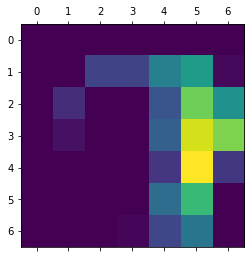

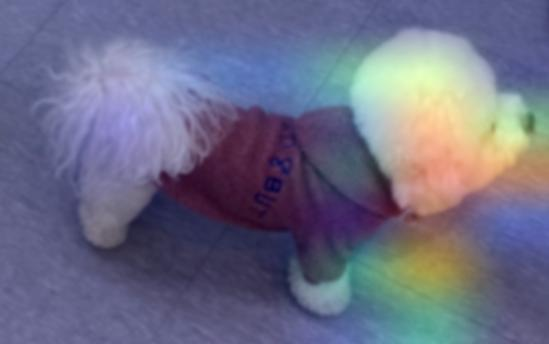

--------------------------------------------------------------------------------
without-leash
[[1.5490966e-04 9.9984503e-01]]


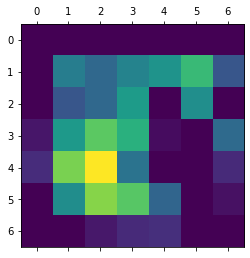

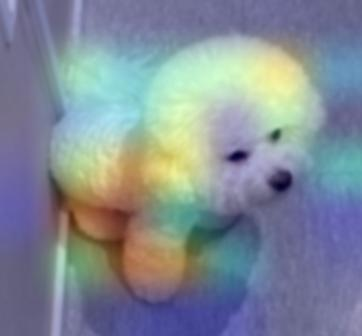

--------------------------------------------------------------------------------
without-leash
[[1.6231948e-05 9.9998379e-01]]


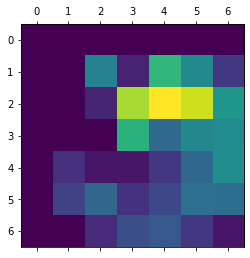

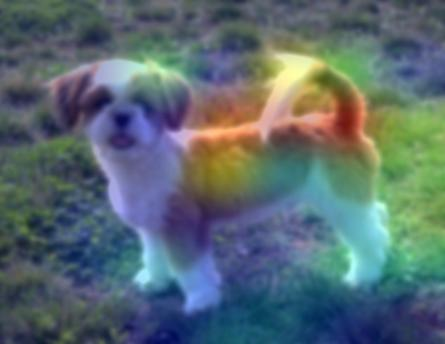

--------------------------------------------------------------------------------


In [ ]:
for i in imgs_without:
    gcm.show_GradCAM(i,img_size=(224,224),model=new_model,last_conv_layer_name = 'conv5_block3_3_conv')